# importing dataset


In [2]:
import pandas as pd


In [63]:
import numpy as np

In [8]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9671e695c4f343e99bce74ffc90535bf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YtGs0-6VUXzsliws94zpUvAJPekcJqTIAiLS3J7ZZwK2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9671e695c4f343e99bce74ffc90535bf.get_object(Bucket='lifeprediction-donotdelete-pr-mp1kxnofubyjfk',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# data preprocessing

In [10]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
dataset.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [12]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
dataset=dataset.fillna(dataset.mean())

In [14]:
dataset.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Exploring data analysis

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

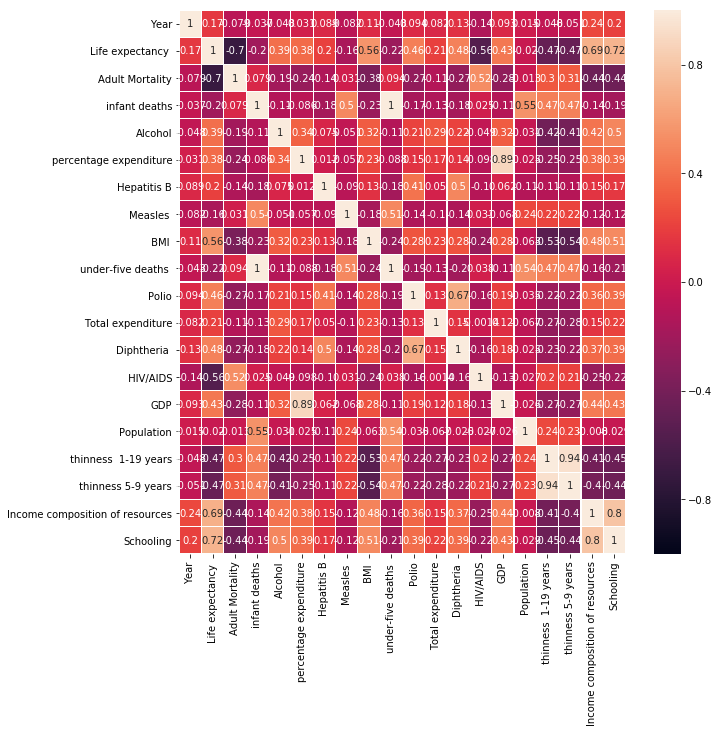

In [20]:
df_kor=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor,vmin=-1,vmax=1,annot=True,linewidth=0.1)

In [27]:
#dividing into independent and dependent vectors
Y=dataset['Life expectancy ']
X=dataset[dataset.columns.difference(['Life expectancy '])]
dataset.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [34]:
X.columns


Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Country', 'Diphtheria ', 'GDP',
       'Hepatitis B', 'Income composition of resources', 'Measles ', 'Polio',
       'Population', 'Schooling', 'Status', 'Total expenditure', 'Year',
       'infant deaths', 'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
labelencoder_X1=LabelEncoder()


In [40]:
X[:, 6] = labelencoder_X1.fit_transform(X[:, 6])


TypeError: '(slice(None, None, None), 6)' is an invalid key

In [53]:

X[:,'Status']=0 


TypeError: unhashable type: 'slice'

In [54]:
X


,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Country,Diphtheria,GDP,Hepatitis B,...,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,19.1,0.1,17.2,17.3,263.0,0.010000,0,65.0,584.259210,65.000000,...,1154,6.0,33736494.0,10.1,0,8.16000,2015,62,71.279624,83
1,18.6,0.1,17.5,17.5,271.0,0.010000,0,62.0,612.696514,62.000000,...,492,58.0,327582.0,10.0,0,8.18000,2014,64,73.523582,86
2,18.1,0.1,17.7,17.7,268.0,0.010000,0,64.0,631.744976,64.000000,...,430,62.0,31731688.0,9.9,0,8.13000,2013,66,73.219243,89
3,17.6,0.1,17.9,18.0,272.0,0.010000,0,67.0,669.959000,67.000000,...,2787,67.0,3696958.0,9.8,0,8.52000,2012,69,78.184215,93
4,17.2,0.1,18.2,18.2,275.0,0.010000,0,68.0,63.537231,68.000000,...,3013,68.0,2978599.0,9.5,0,7.87000,2011,71,7.097109,97
5,16.7,0.1,18.4,18.4,279.0,0.010000,0,66.0,553.328940,66.000000,...,1989,66.0,2883167.0,9.2,0,9.20000,2010,74,79.679367,102
6,16.2,0.1,18.6,18.7,281.0,0.010000,0,63.0,445.893298,63.000000,...,2861,63.0,284331.0,8.9,0,9.42000,2009,77,56.762217,106
7,15.7,0.1,18.8,18.9,287.0,0.030000,0,64.0,373.361116,64.000000,...,1599,64.0,2729431.0,8.7,0,8.33000,2008,80,25.873925,110
8,15.2,0.1,19.0,19.1,295.0,0.020000,0,63.0,369.835796,63.000000,...,1141,63.0,26616792.0,8.4,0,6.73000,2007,82,10.910156,113
9,14.7,0.1,19.2,19.3,295.0,0.030000,0,58.0,272.563770,64.000000,...,1990,58.0,2589345.0,8.1,0,7.43000,2006,84,17.171518,116


In [55]:
onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [56]:
X


array([[ 1.        ,  0.        ,  0.        , ..., 62.        ,
        71.27962362, 83.        ],
       [ 1.        ,  0.        ,  0.        , ..., 64.        ,
        73.52358168, 86.        ],
       [ 1.        ,  0.        ,  0.        , ..., 66.        ,
        73.21924272, 89.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 25.        ,
         0.        , 40.        ],
       [ 0.        ,  0.        ,  0.        , ..., 25.        ,
         0.        , 39.        ],
       [ 0.        ,  0.        ,  0.        , ..., 24.        ,
         0.        , 39.        ]])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Building the random forest regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
#testing test_dataset
Y_pred=regressor.predict(X_test)

# error analysis


In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

3.721381244891046

# Building and Deploying Model 

In [66]:
!pip install watson_machine_learning_client

In [67]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [68]:
wml_credentials={
   "apikey": "m8iM_FSz6Yd8ko9kS_icIItBu2x_Lr3VyhHuyqT7eJgf",
  "iam_apikey_description": "Auto-generated for key 699561fe-5c47-4e7f-a0b8-f832ece6434f",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/024b76eefddd40e6b2b19d93ed6264e5::serviceid:ServiceId-6d886645-b618-4b26-ae97-b958341a90a5",
  "instance_id": "3b1ba739-4578-49c6-95fb-02815ea1981b",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://eu-gb.ml.cloud.ibm.com


In [73]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Manik", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "manikmangla9@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}
#STORE THE MACHINE LEARNING MODEL
model_artifact=client.repository.store_model(regressor, meta_props=model_props)

In [74]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployment = client.deployments.create(model_uid, name="PredictingLifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: '4ad50223-30c0-412b-868e-01e36c14ceb5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8d5475d1-e4bb-4475-b2be-447dc2539a12'
------------------------------------------------------------------------------------------------




In [75]:
#GET SCORING END-POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/3b1ba739-4578-49c6-95fb-02815ea1981b/deployments/8d5475d1-e4bb-4475-b2be-447dc2539a12/online
